<a href="https://colab.research.google.com/github/RedeemerNtumy/JCPennyConsultancyProject/blob/master/3549063_BD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# University of Stirling

## A Consultancy Job for JC Penney



### 1. BUSINESS UNDERSTANDING
JC Penney has provided data about products bought by their customers across their stores and the reviews of those who bought them. The goal of this project is to conduct an exploratory data analysis to identify and quantify key strategic opportunities for JCPenney leadership.


### 2. DATA UNDERSTANDING

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import requests

In [2]:
# Loading products data first from csv
products = pd.read_csv("products.csv")

In [3]:
# Loading products data from json as well since it has extra features
# Setting Lines to true since each line in the json data is a json object
products_json = pd.read_json("jcpenney_products.json", lines= True)

In [4]:
# Loading users data
users = pd.read_csv("users.csv")

In [5]:
# Loading reviews data
reviews = pd.read_csv("reviews.csv")

#### 2.1 Product Data Exploration

In [6]:
# Viewing the first 3 rows
products.head(3)

,Uniq_id,SKU,Name,Description,Price,Av_Score
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.000
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625


In [7]:
def data_summary(data_frame : pd.DataFrame) -> None :
  '''
  This function expects a Dataframe
  as an argument and prints out the:
  1. Information about the data
  2. Dimensions of the data
  3. Descriptive Statistics about the data
  '''
  print(data_frame.info())
  print(f" This data has {data_frame.shape[0]} rows and {data_frame.shape[1]} columns")
  print(data_frame.describe())

In [8]:
# Using my function on the products dataset to get information about it
data_summary(products)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7982 entries, 0 to 7981
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Uniq_id      7982 non-null   object 
 1   SKU          7915 non-null   object 
 2   Name         7982 non-null   object 
 3   Description  7439 non-null   object 
 4   Price        5816 non-null   float64
 5   Av_Score     7982 non-null   float64
dtypes: float64(2), object(4)
memory usage: 374.3+ KB
None
 This data has 7982 rows and 6 columns
              Price     Av_Score
count   5816.000000  7982.000000
mean     144.776618     2.988683
std      499.223719     0.911673
min      -65.270000     1.000000
25%       40.700000     2.500000
50%       58.010000     3.000000
75%       87.020000     3.500000
max    17122.170000     5.000000


#### 2.2 Users Data Exploration

In [9]:
# Viewing the first 3 rows
users.head(3)

,Username,DOB,State
0,bkpn1412,31.07.1983,Oregon
1,gqjs4414,27.07.1998,Massachusetts
2,eehe1434,08.08.1950,Idaho


In [10]:
# Reusing the function on the users dataset
data_summary(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  5000 non-null   object
 1   DOB       5000 non-null   object
 2   State     5000 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB
None
 This data has 5000 rows and 3 columns
        Username         DOB          State
count       5000        5000           5000
unique      4999          52             57
top     dqft3311  07.08.1953  Massachusetts
freq           2         112            107


#### 2.3 Reviews Data Exploration

In [11]:
# Viewing the first 3 rows
reviews.head(3)

,Uniq_id,Username,Score,Review
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,2,You never have to worry about the fit...Alfred...
1,b6c0b6bea69c722939585baeac73c13d,krpz1113,1,Good quality fabric. Perfect fit. Washed very ...
2,b6c0b6bea69c722939585baeac73c13d,mbmg3241,2,I do not normally wear pants or capris that ha...


In [12]:
# Reusing the function on the users dataset
data_summary(reviews)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Uniq_id   39063 non-null  object
 1   Username  39063 non-null  object
 2   Score     39063 non-null  int64 
 3   Review    39063 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
None
 This data has 39063 rows and 4 columns
              Score
count  39063.000000
mean       1.487648
std        1.400332
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        5.000000


#### 2.4 Observations

Products Dataset:
- Contains 7,982 products with 6 columns
- Negative prices detected (minimum price is negative)
- Missing values found in SKU column

Users Dataset:
- Contains exactly 5000 reviews
- Massachusettes has the highest number of users
- DOB needs conversion to calculate customer age

Reviews Dataset:
- Contains 39063 reviews with 6 columns
- Links customers to products via Username and Uniq_id
- Can be merged with users and products for deeper analysis

### 3. DATA PREPARATION

In [13]:
# Creating a copy of the initial dataset for data intergrity
updated_products = products.copy()

In [14]:
# Finding the number of negative prices
len(updated_products[updated_products["Price"]<0])

44

In [15]:
updated_products["Price"] = abs(updated_products["Price"])
updated_products.describe() # Verifying that negative prices are removed

,Price,Av_Score
count,5816.000000,7982.000000
mean,145.424555,2.988683
std,499.035327,0.911673
min,8.010000,1.000000
25%,41.042500,2.500000
50%,58.010000,3.000000
75%,87.020000,3.500000
max,17122.170000,5.000000


In [16]:
# Checking for null values
updated_products.isna().sum()

,0
Uniq_id,0
SKU,67
Name,0
Description,543
Price,2166
Av_Score,0


Over 2000 rows of price data are missing. This is almost a third of the product dataset. Experimenting with some imputation techniques may have helped as a good estimate. However due to the number of missing values, I have decided to no longer factor in the price for my analysis. I am shifting my focus now to the user dataset to find what I can use.

In [17]:
# Creating a copy since I plan on modifying data
updated_users = users.copy()

I believe the Age has more information I can use than the Date of Birth. I will use the Date of Birth to generate a new feature "Age"

In [18]:
# Convert the 'DOB' column to datetime objects.
updated_users['DOB'] = pd.to_datetime(updated_users['DOB'], format='%d.%m.%Y',
                                      errors='coerce')

In [19]:
# Subtracting the birth year from the current year to get the estimated age
current_date = pd.to_datetime('today')
updated_users['Age'] = (current_date.year - updated_users['DOB'].dt.year)

In [21]:
# Adjusting age for birthdays that haven't happened yet this year
updated_users['Age'] = updated_users.apply(lambda row:
                  row['Age'] - ((current_date.month < row['DOB'].month) |
                  ((current_date.month == row['DOB'].month) &
                  (current_date.day < row['DOB'].day))) if pd.notna(row['DOB'])
                  else row['Age'], axis=1)

In [22]:
# Trying to obtain extra insights from the new column
updated_users["Age"].describe()

,Age
count,5000.000000
mean,49.761200
std,15.000146
min,24.000000
25%,37.000000
50%,50.000000
75%,63.000000
max,75.000000


Having similar mean and median values implies the age distribution is roughly symmetric with no strong skewness.

From the initial exploration, I realised
Massachusetts had the highest number of users.

This is suprising since Massachusetts is not the biggest state and JCPenney has customers across all states.

This has led me to include population data of
every state in the US so I can compare against
their number of customers. This will allow me to know their rate per population

In [23]:
try:
    # Access to the API requires an API key
    with open("key.txt") as key:
        api_key = key.read()

    # Most current year available is 2023
    api_url = f"https://api.census.gov/data/2023/pep/charv?get=POP&for=state:*&key={api_key}"

    response = requests.get(api_url)
    response.raise_for_status()

    data = response.json()
    population_df = pd.DataFrame(data[1:], columns=data[0])

    print("Successfully fetched US Census population data")

except Exception as e:
    print(f"Warning: Could not fetch Census data....Falling back to saved json")
    # Fallback to a downloaded version of population data if an error occurs
    population_df = pd.read_json("2023POP.json")
    population_df = pd.DataFrame(population_df.iloc[1:].values,
                                 columns=population_df.iloc[0])

Successfully fetched US Census population data


In [24]:
# Loading custom fip codes csv since the states
# from the external data are written in fip codes
usa_fips = pd.read_csv("us_states_fips.csv")

In [25]:
# This dataset maps a state to its Fip code
usa_fips.head(3)

,FIPS,State
0,1,Alabama
1,2,Alaska
2,4,Arizona


In [26]:
# Convert the column to numeric since it contains numbers
population_df['state'] = pd.to_numeric(population_df['state'])

In [27]:
# Merge population_df with usa_fips to add state names
merged_population_df = pd.merge(population_df, usa_fips, left_on='state',
                                right_on='FIPS', how='left')

In [28]:
# Drop the redundant FIPS column from the merged DataFrame
merged_population_df = merged_population_df.drop('state', axis=1)

In [29]:
"""
Keeping the higher estimate since population
in 2025 should have increased more than the higher
estimate of 2023
"""
latest_population_df = merged_population_df.iloc[1::2].reset_index(drop=True)
latest_population_df['POP'] = pd.to_numeric(latest_population_df['POP'])

### 4. DATA VISUALISATION

In [36]:
def plot_top_distribution(
    data: pd.Series | None,
    title: str,
    xlabel: str,
    ylabel: str,
    is_series: bool = True,
    labels: list | None = None,
    values: list | None = None
) -> None:
    """
    Plots a bar chart of the top items in a dataset.

    Parameters:
    - data: pd.Series | None — pandas Series
    - title: str — chart title
    - xlabel: str — label for the x axis
    - ylabel: str — label for the y axis
    - is_series: bool — True if 'data' is a pandas Series (default)
    - labels: list | None — used if is_series=False
    - values: list | None — used if is_series=False
    """
    plt.figure(figsize=(12, 6))
    plt.style.use('seaborn-v0_8-whitegrid')

    if is_series:
        # Plot directly from a pandas Series
        bars = data.plot(kind='bar', color='#1f77b4', edgecolor='black')
    else:
        # Plot manually using labels and values
        bars = plt.bar(labels, values, color='#1f77b4', edgecolor='black')

    plt.title(title, fontsize=16, fontweight='bold', pad=15)
    plt.xlabel(xlabel, fontsize=12, labelpad=10)
    plt.ylabel(ylabel, fontsize=12, labelpad=10)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.box(False)
    plt.show()


#### 4.1 Age Distribution

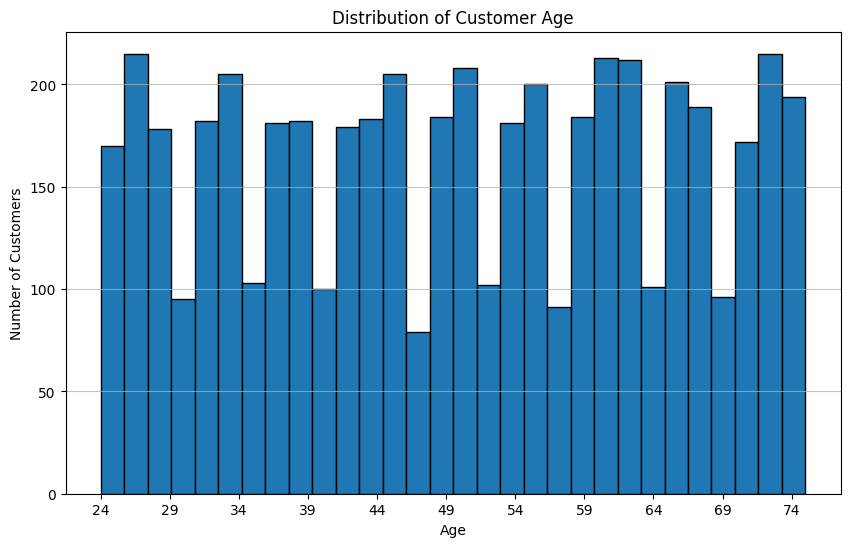

In [37]:
# Chose the histogram because it easily plots the distribution
# A Density Plot could also be used for this
plt.figure(figsize=(10, 6))
plt.hist(updated_users['Age'], bins=30, edgecolor='black')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)
plt.xticks(np.arange(min(updated_users["Age"]), max(updated_users["Age"]), 5));

While there seems to be a similar distribution of customers across all ages, there are no customers between the ages of 18 and 23. Since it is quite difficult to find out which age groups are significantly more, I have decided to look more into the products

#### 4.2 Most Frequently bought products

In [41]:
# Get the top 10 products
top_10_product_name_counts = updated_products['Name'].value_counts().nlargest(10)
# A treemap can also be used for this.
plot_top_distribution(
    data=top_10_product_name_counts,
    title='Top 10 Most Frequently Bought Products',
    xlabel='Product Name',
    ylabel='Frequency'
)

At this point, I want to confirm if Champion and Clarks are among the top performing brands

#### 4.3 Top  Brands among the top selling products

In [44]:
# Get the counts for the top 10 products
plot_labels = top_10_product_name_counts.index.tolist()
top_10_products_df = updated_products[updated_products['Name'].isin(plot_labels)].copy()

In [45]:
# Merge with brand information
merged_top_products = pd.merge(
    top_10_products_df,
    products_json[['uniq_id', 'brand']],
    left_on='Uniq_id',
    right_on='uniq_id',
    how='left'
)

In [46]:
# Count brand occurrences in top products
top_brand_counts = products_json['brand'].value_counts().nlargest(10)

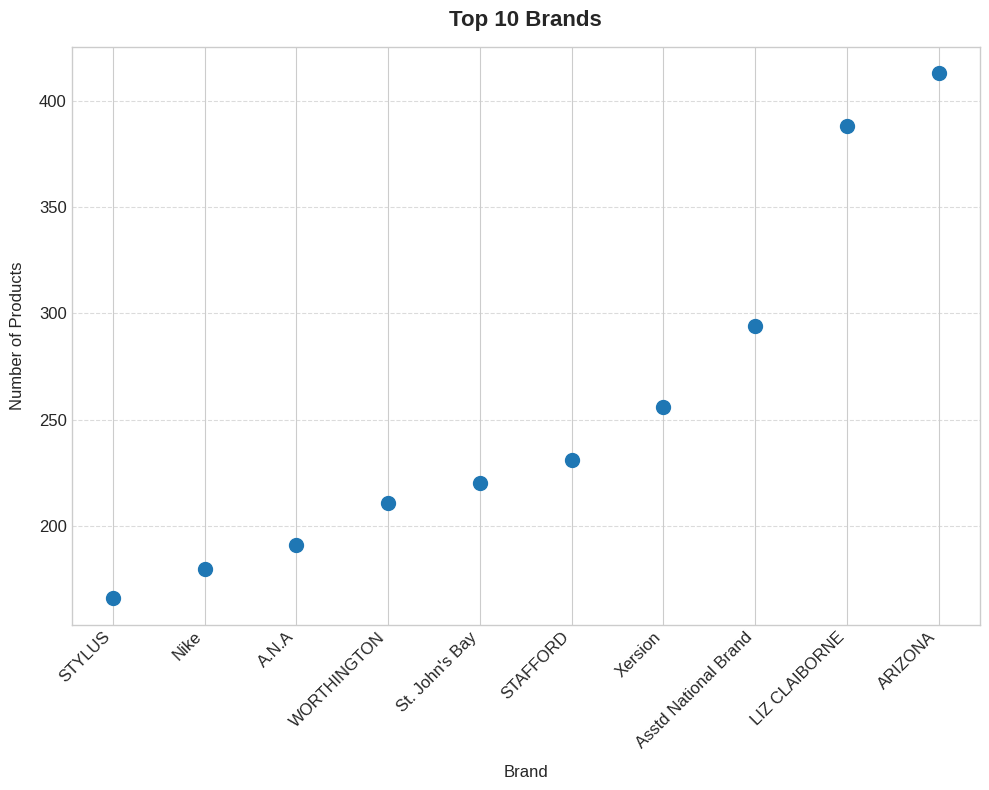

In [47]:
# Sorting in ascending order so a pattern can be seen
top_brand_counts_asc = top_brand_counts.sort_values(ascending=True)
# A bar chart can also be used for this
plt.figure(figsize=(10, 8))
plt.scatter(top_brand_counts_asc.index, top_brand_counts_asc.values, color='#1f77b4', s=100) # s is marker size
plt.title('Top 10 Brands', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Brand', fontsize=12, labelpad=10)
plt.ylabel('Number of Products', fontsize=12, labelpad=10)
plt.xticks(rotation = 45, ha ="right",fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

I could have done an analysis about the profit each brand brings or the profit private label brands and external brands bring, however, as already stated, the price data is not in a position to be used for this. I have decided to shift my focus to national presence and market penetration

#### 4.4 Geographic Distribution

In [48]:
# Number of people from each state that bought a product
state_counts = users['State'].value_counts()

In [49]:
# Importing extra libraries that would be needed
import plotly.express as px
import json

In [50]:
"""
I created this file myself after referring to
plotly's documentation that specified the need
for the abbreviations of each state in order to plot
"""
with open('state_abbrev.json', 'r') as f:
    state_abbrev = json.load(f)

In [51]:
# Mapping the full states names to the abbreviations
state_counts_df = state_counts.reset_index()
state_counts_df.columns = ['State', 'User_Count']
state_counts_df['State_Code'] = state_counts_df['State'].map(state_abbrev)

In [52]:
# These are territories that are not shown in the Official 50 state map
unmapped_states_list = ["Northern Mariana Islands",
                        "Minor Outlying Islands", "American Samoa",
                        "Guam", "U.S. Virgin Islands",
                        "District of Columbia"]

In [53]:
# Filter the state_counts_df to create the 'unmapped' DataFrame based on the list
unmapped = state_counts_df[state_counts_df['State'].isin(unmapped_states_list)].copy()

In [54]:
# Plot the choropleth map of the US states. Unofficial States will be excluded
# A bar chart can be used but there are over 50 states which
# can make the graph too busy. Can be broken in sections
mapped_states_df = state_counts_df[~state_counts_df['State'].isin(unmapped_states_list)].copy()

fig = px.choropleth(mapped_states_df,
                    locations='State_Code', # Column with state names
                    locationmode="USA-states",  # Set to plot US states
                    color='User_Count', # Column with the value to color by
                    scope="usa",  # Focus the map on the USA
                    color_continuous_scale="Viridis", # Colormap
                    title="Geographic Distribution of JCPenney Customers by State",
                    hover_name="State",  # Show full name on hover
                    hover_data={'State_Code': False, 'User_Count': True} # Display additional data on hover
                    )

fig.update_layout(
    title_x=0.5,
    geo_scope='usa', # Ensures just the map of USA shows
)

fig.show()

In [55]:
# Created another function for plotting bar graphs
def plot_bar_graph(
    data: pd.DataFrame,
    title: str,
    xlabel: str,
    ylabel: str,
    label_col: str,
    value_col: str,
) -> None:
    """
    Plots a visually polished bar chart of items and their corresponding values with annotations.

    Parameters
    ----------
    data : pd.DataFrame
        DataFrame containing the data to plot.
    title : str
        Title of the chart.
    xlabel : str
        Label for the x-axis.
    ylabel : str
        Label for the y-axis.
    label_col : str
        Column name to use for x-axis labels.
    value_col : str
        Column name to use for bar heights (y-axis values).

    Returns
    -------
    None
        Displays a bar chart.
    """
    plt.figure(figsize=(12, 6))
    plt.style.use('seaborn-v0_8-whitegrid')  # Clean and modern look

    # Plot the bars
    bars = plt.bar(
        data[label_col],
        data[value_col],
        color='#1f77b4',
        edgecolor='black'
    )

    plt.title(title, fontsize=16, fontweight='bold', pad=15)
    plt.xlabel(xlabel, fontsize=12, labelpad=10)
    plt.ylabel(ylabel, fontsize=12, labelpad=10)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.box(False)
    plt.show()

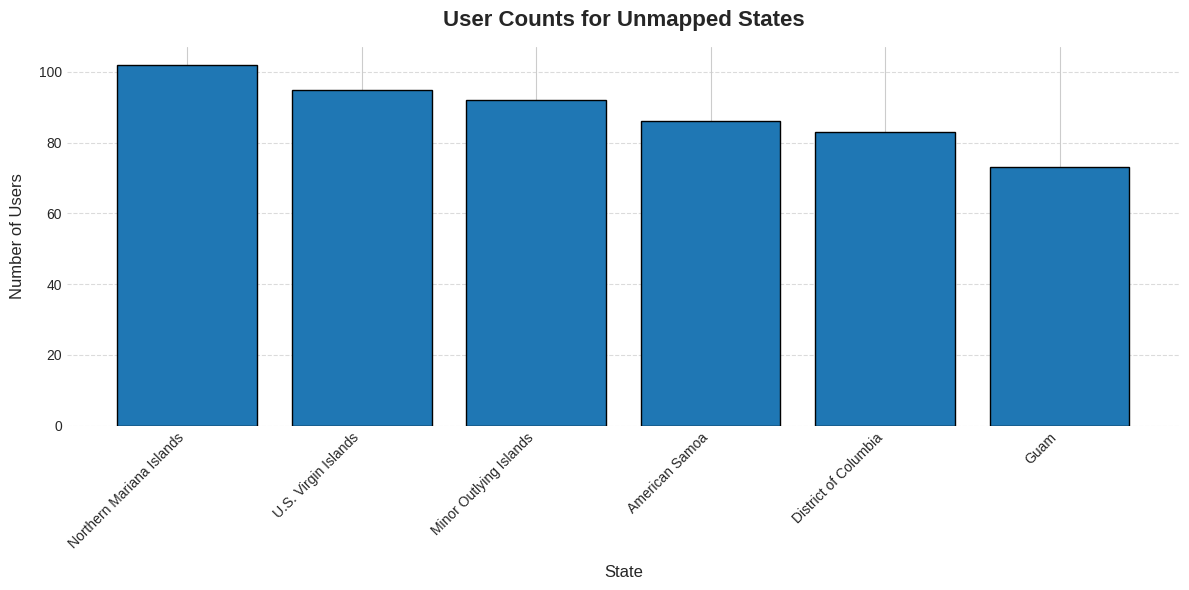

In [56]:
# Plotting the distribution of users in unmapped states
plot_bar_graph(
    data=unmapped,
    title='User Counts for Unmapped States',
    xlabel='State',
    ylabel='Number of Users',
    label_col='State',
    value_col='User_Count'
)

In [57]:
"""
As mentioned earlier, this insight can be misleading. With the
help of the population data, I can now calculate rate per population
"""
user_counts_by_state = updated_users['State'].value_counts().reset_index()
user_counts_by_state.columns = ['State', 'User_Count']
merged_population_users = pd.merge(user_counts_by_state, latest_population_df, on='State', how='inner')
merged_population_users['Rate_Per_10K'] = (merged_population_users['User_Count'] / merged_population_users['POP']) * 10000
merged_population_users['State_Code'] = merged_population_users['State'].map(state_abbrev)

I used 10000 as the standardisation factor because it is a common
statistical convention for comparing rates across populations
of different sizes. It has allowed me to compare between states,
regardless of how large or small their populations are,
making it easy for me to identify where JC Penney has proportionally
higher market penetration

In [58]:
# US Minor Outlying Islands have no permanent residents so it has been excluded
merged_population_users
fig = px.choropleth(merged_population_users,
                    locations='State_Code',
                    locationmode="USA-states",
                    color='Rate_Per_10K',
                    scope="usa",
                    color_continuous_scale="Viridis",
                    title="Geographic Distribution of JCPenney Customers by State (Rate per 10,000 Population)",
                    hover_name="State",
                    hover_data={'State':False, 'User_Count':True, 'POP':True, 'Rate_Per_10K':':.2f'}
                   )

fig.update_layout(
    title_x=0.5, # Center the title
    geo_scope='usa',  # Ensure the map is centered on the USA
)

fig.show()

In [59]:
"""
The Census Data provided only population for the 50 states.
I had to search for the population of the territories
and create a json for it

"""
try:
    with open('territories.json', 'r') as f:
        territories_population_data = json.load(f)
except FileNotFoundError:
    print("Error: 'territories.json' not found.")
    raise

territories_df = pd.DataFrame(territories_population_data)

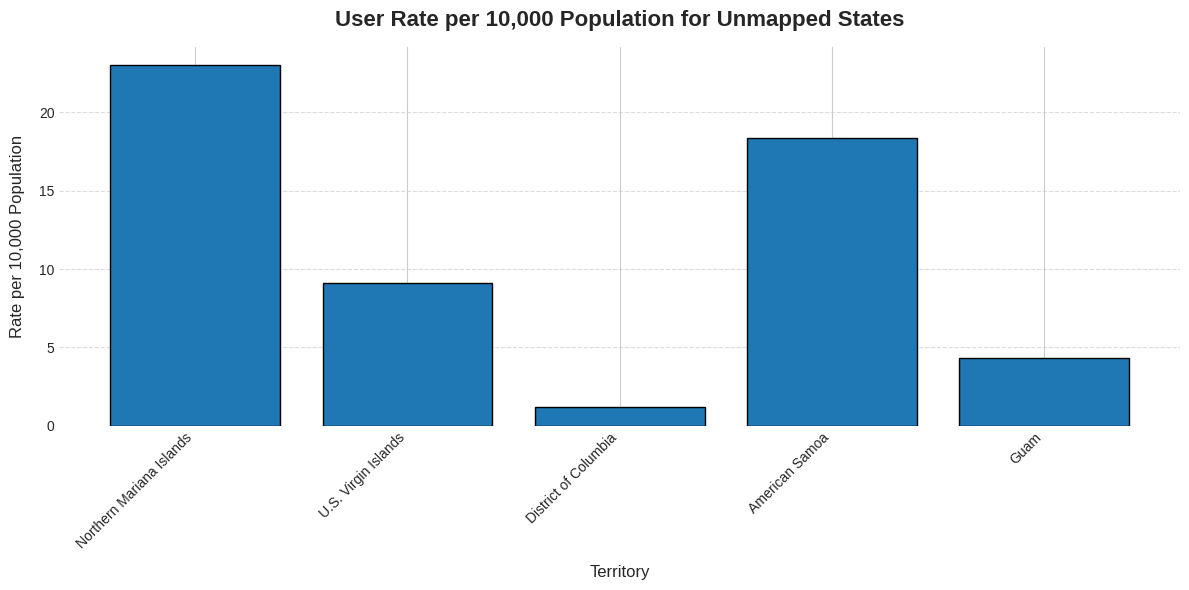

In [60]:
# Merge user counts with territory population data
merged_territories_data = pd.merge(territories_df, state_counts_df, on='State', how='inner')

# Calculate Rate_Per_10K for territories
merged_territories_data['Rate_Per_10K'] = (merged_territories_data['User_Count'] / merged_territories_data['population']) * 10000

# Plot a bar chart of the territories' Rate_Per_10K
plot_bar_graph(
    data=merged_territories_data,
    title='User Rate per 10,000 Population for Unmapped States',
    xlabel='Territory',
    ylabel='Rate per 10,000 Population',
    label_col='State',
    value_col='Rate_Per_10K'
)